In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [12]:
df.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10162,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10163,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10164,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10165,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
X = df.iloc[:-1, 3:].values
y = df['price'][:-1].values

In [5]:
y.shape

(10166,)

In [6]:
X.shape

(10166, 18)

In [7]:
X

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ..., -1.22257e+02,
         1.34000e+03,  5.65000e+03],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ..., -1.22319e+02,
         1.69000e+03,  7.63900e+03],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ..., -1.22233e+02,
         2.72000e+03,  8.06200e+03],
       ...,
       [ 3.00000e+00,  1.00000e+00,  1.86400e+03, ..., -1.22206e+02,
         9.90000e+02,  8.00000e+03],
       [ 4.00000e+00,  1.75000e+00,  1.93000e+03, ..., -1.22312e+02,
         1.85000e+03,  6.38000e+03],
       [ 4.00000e+00,  2.50000e+00,  3.87000e+03, ..., -1.22045e+02,
         2.17000e+03,  6.58430e+04]])

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 24)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
X_train = scaler.fit_transform(X_train)

In [10]:
X_test = scaler.transform(X_test)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
model = Sequential()

In [13]:
model.add(Dense(18, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(18, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [14]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=300)

Epoch 1/300
119/119 [==============================] - 0s 3ms/step - loss: 431728132096.0000 - val_loss: 415516426240.0000
Epoch 2/300
119/119 [==============================] - 0s 2ms/step - loss: 430778449920.0000 - val_loss: 412096069632.0000
Epoch 3/300
119/119 [==============================] - 0s 2ms/step - loss: 413875798016.0000 - val_loss: 373845852160.0000
Epoch 4/300
119/119 [==============================] - 0s 2ms/step - loss: 326931480576.0000 - val_loss: 240941137920.0000
Epoch 5/300
119/119 [==============================] - 0s 2ms/step - loss: 167748501504.0000 - val_loss: 109314686976.0000
Epoch 6/300
119/119 [==============================] - 0s 2ms/step - loss: 91198742528.0000 - val_loss: 81357004800.0000
Epoch 7/300
119/119 [==============================] - 0s 2ms/step - loss: 76406538240.0000 - val_loss: 72488927232.0000
Epoch 8/300
119/119 [==============================] - 0s 2ms/step - loss: 69801402368.0000 - val_loss: 67495604224.0000
Epoch 9/300
119/119 [=

In [17]:
loss_df = pd.DataFrame(model.history.history)

In [18]:
loss_df

,loss,val_loss
0,4.317281e+11,4.155164e+11
1,4.307784e+11,4.120961e+11
2,4.138758e+11,3.738459e+11
3,3.269315e+11,2.409411e+11
4,1.677485e+11,1.093147e+11
...,...,...
295,2.588856e+10,2.604828e+10
296,2.587930e+10,2.600791e+10
297,2.588082e+10,2.601094e+10
298,2.582378e+10,2.603669e+10


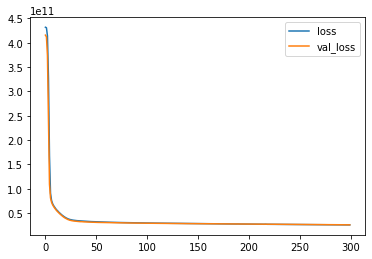

In [19]:
loss_df.plot()